# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 8</span>

É assegnato un potenziale $V(x) = x^4 - \frac{5}{2}x^2$ e si desidera ottimizzare il ground state di una particella 1D confinata in $V(x)$. Questo modello non si può risolvere in modo analitico ed è necessario ricorrere a metodi numerici e al principio variazionale.  
Conoscendo il potenziale, si ipotizza una ragionevole forma della funzione d'onda del ground state (questa sarà chiamata funzione di prova), nel nostro caso scegliamo una somma di gaussiane:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$  
La funzione di prova dipende da alcuni parametri ($\mu$ e $\sigma$): il principio variazionale ci assicura che esplorando i diversi valori dei parametri, troveremo il ground state (e quando sbaglieremo, sbaglieremo sempre per eccesso).

### <span style="color: #FF5733 "> Esercizio 08.1</span>

Ho scritto un programma che campiona $|\Psi_T(x)|^2$  (a $\mu$ e $\sigma$ fissati) usando l'algoritmo di Metropolis con probabilità di transizione uniforme. Campionando punti secondo la $|\Psi_T(x)|^2$ si può stimare l'energia tramite un *importance sampling*, come:  

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$  
con $H=\frac{-\hbar ^2}{2m}\frac{d}{dx^2}+V(x)$  

In particolare, il mio codice legge da file input i valori di $\mu$, $\sigma$ $\delta$, il numero di passi totale e il numero di blocchi. Esegue poi l'equilibrazione, regolando il parametro $\delta$ in modo da avere accettanza uguale a circa $1/2$ ed esegue poi il *sampling*. Eseguo un ciclo esterno sui blocchi e un ciclio interno sulle misure all'interno del blocco. Con la funzione *Passo* realizzo l'algoritmo di metropolis e con la funzione *Accumula* accumulo le stime dell'energia, per poi calcolare la media del blocco attuale e l'errore nella funzione *Blocks*.

### <span style="color: #FF5733 "> Esercizio 08.2</span>

Ho realizzato il seguente script Python che esegue il codice in C++ descritto sopra, facendo variare i parametri $\mu$ e $\sigma$ sul file di input. In questo modo, sfruttando il principio variazionale:
$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$  

posso avvicinarmi sempre di più a capire quali siano i corretti parametri per descrivere il ground state.
In particolare, uso 20 valori di $\mu$ compresi tra 0.74 e 0.83 e 20 valori di $\sigma$ compresi tra 0.60 e 0.65, considerando così 400 coppie ($\mu$,$\sigma$). Per ogni esecuzione del codice (che comprende 100000 passi in totoale divisi in 100 blocchi), salvo il valore dell'energia relativo all'ultimo blocco e il suo errore. Individuo poi qual è la coppia ($\mu$,$\sigma$) che fornisce il più piccolo valore di energia dell'ipotetico ground state e scrivo questi valori sul file di input.

In [18]:
%%time
import numpy as np
import subprocess 

m=np.linspace(0.74,0.83, num=20, endpoint=True)
s=np.linspace(0.60, 0.65, num=20, endpoint=True)
energy=np.zeros(m.size*s.size)
errors=np.zeros(m.size*m.size)
for i in range(0,m.size):
   # print(i)
    for j in range (0,s.size):
        f=open ("input.dat", "r+")
        lines=f.readlines()
        lines[0]=str(m[i])+"\n" 
        lines[1]=str(s[j])+"\n" 
        f.close()
        f=open("input.dat", "w+")
        for k in range(0,len(lines)):
            f.write(str(lines[k]))
        f.close()
        cmd="./es081" #eseguo il codice
        value=subprocess.call(cmd, shell=True)
    #    print("ho eseguito il codice")
        energy[(i*s.size)+j]=np.loadtxt("blocchi.dat", usecols=(1), delimiter='\t', skiprows=99) #calcolo energia  
        errors[(i*s.size)+j]=np.loadtxt("blocchi.dat", usecols=(2), delimiter='\t', skiprows=99)
   #     print("ho assegnato l'energia")

print(np.argmin(energy))
min_index=np.argmin(energy)
mu_index=(min_index//s.size) #indice di mubest
s_index=(min_index%s.size) #indice di sigmabest
#print("ho trovato gli indici di minimo")
lines[0]=str(m[mu_index])+"\n"
lines[1]=str(s[s_index])+"\n"
lines[4]=str(1000000)+"\n"
f=open("input.dat", "w+") #scrivo sul file input.dat mubest e sigmabest
for k in range(0,len(lines)):
    f.write(str(lines[k]))
f.close()
cmd="./es081" #eseguo il codice
value=subprocess.call(cmd, shell=True)
print(m[mu_index])
print(s[s_index])
print(energy)
print(energy[min_index])

283
0.8063157894736842
0.6078947368421053
[-0.426025 -0.425816 -0.428532 -0.429126 -0.433632 -0.430897 -0.42853
 -0.42873  -0.427837 -0.429949 -0.428446 -0.430178 -0.429216 -0.431182
 -0.427964 -0.429611 -0.429119 -0.428697 -0.426768 -0.42731  -0.428973
 -0.430256 -0.432793 -0.428619 -0.430533 -0.432173 -0.435566 -0.433746
 -0.431804 -0.434556 -0.429764 -0.431366 -0.430814 -0.432169 -0.430907
 -0.430937 -0.428941 -0.430218 -0.431821 -0.428905 -0.431641 -0.43353
 -0.433147 -0.433779 -0.433664 -0.435064 -0.431499 -0.435675 -0.432266
 -0.434331 -0.433031 -0.433586 -0.432129 -0.434077 -0.431199 -0.434058
 -0.433223 -0.433827 -0.43081  -0.427965 -0.432783 -0.432615 -0.435129
 -0.435241 -0.435799 -0.437359 -0.436068 -0.43859  -0.437344 -0.434538
 -0.435184 -0.434921 -0.432442 -0.433384 -0.436237 -0.432701 -0.433191
 -0.432242 -0.433139 -0.430835 -0.433955 -0.436705 -0.436705 -0.437763
 -0.436764 -0.439128 -0.439524 -0.440093 -0.437596 -0.436908 -0.435829
 -0.437575 -0.437494 -0.434962 -0.433

Ho poi creato un grafico in cui rappresento l'energia con il suo errore statistico, in funzione del blocco.

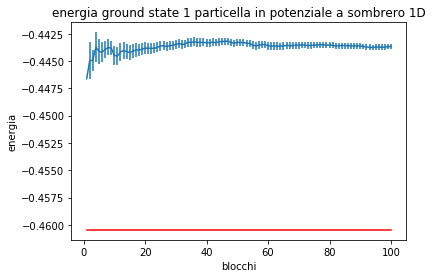

In [20]:
import matplotlib
import matplotlib.pyplot as plt

e, r, error = np.loadtxt("blocchi.dat", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(e,r,yerr=error)
g=np.full(e.size, -0.46046587969271535)
plt.plot(e,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('energia')
plt.title('energia ground state 1 particella in potenziale a sombrero 1D')

plt.show()

Nonostante l'ottimizzazione dei parametri, trovo un'energia più alta di quella trovata discretizzando e risolvendo l'equazione di Schrodinger (in rosso nel grafico). Visto che credo di poter dire di aver ottimizzato abbastanza bene i parametri e, se la simulazione viene eseguita con un sufficiente numero di passi, non ci sono motivi per cui il Monte Carlo dovrebbe sbagliare, ipotizzo che il motivo della discrepanza osservata sia che la somma di gaussiane da cui sono partita non è una buona funzione di prova.

Ho inoltre creato un istogramma per poter osservare la $|\Psi_T(x)|^2$ campionata con il Metropolis. Terminato il campionamento di un punto (cioè immediatamente dopo la funzione *Passo*, con la funzione *Istogramma*, assegno il valore di x campionato a un particolare bin, aumentando le occorrenze in quel bin. Si mostra di seguito il risultato ottenuto, confrontato anche con la curva analitica e quella ottenuta discretizzando l'equazione di Schrodinger,

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def Vpot(x):
    return (x**2 - 2.5)*x**2
    
hbar = 1
M = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*M*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


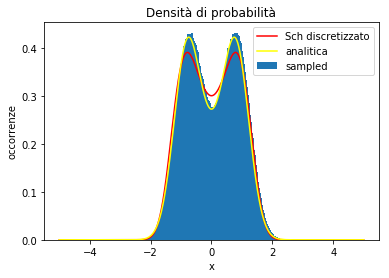

In [22]:
def g(X, mu, sigma):
    return np.exp(-((X-mu)**2)/(2*(sigma)**2))+np.exp(-((X+mu)**2)/(2*(sigma)**2))

normalizzazione=2*s[s_index]*((np.pi)**0.5)*(1+np.exp((-(m[mu_index])**2)/(s[s_index]**2)))
sinistro,occorrenze = np.loadtxt("isto.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge', width=0.08571, label="sampled")
plt.plot(x,(psi[0])**2, color="r", label="Sch discretizzato")
plt.plot(x, ((g(x, m[mu_index], s[s_index]))**2/normalizzazione), color="yellow",label="analitica")
plt.legend()
plt.title('Densità di probabilità')
plt.xlabel('x')
plt.ylabel('occorrenze')
plt.show()

### <span style="color: #FF5733 "> Esercizio 08.3</span>

Ho eseguito il codice fornitomi, con T=0 e funzione d'onda $\Psi_T(x)=1$. Di seguito riporto il grafico dell'energia in funzione del numero del blocco (in rosso riporto il valore di energia di ground state trovato discretizzando e risolvendo l'equzione di Schrodinger). Per trovare l'errore ho eseguito la somma in quadratura dell'errore sull'energia cinetica e di quello sull'energia potenziale e così farò anche nel seguito.

In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

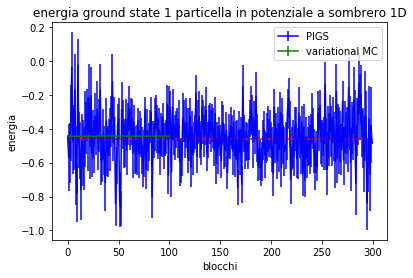

In [31]:
blkkin,kin, errkin=np.loadtxt("QMC_1D/Risultati_T0/kinetictrial.dat",usecols=(0,1,2), delimiter=' ', unpack=True)
blkpot, pot, errpot=np.loadtxt("QMC_1D/Risultati_T0/potentialtrial.dat",usecols=(0,1,2), delimiter=' ', unpack=True)
plt.errorbar(blkkin,kin+pot,yerr=(errkin*errkin+errpot*errpot)**0.5, color="blue", label="PIGS")
g=np.full(blkkin.size, -0.46046587969271535)
plt.plot(blkkin,g,c="red")
plt.errorbar(e,r,yerr=error, color="green", label="variational MC")
plt.xlabel('blocchi')
plt.ylabel('energia')
plt.legend()
plt.title('energia ground state 1 particella in potenziale a sombrero 1D')
plt.show()

Il codice PIGS fornisceuna migliore stima dell'energia di ground state, compatibile con il risultato trovato discretizzando e risolvendo l'equazione di Schrodinger.  

Riporto anche l'isogramma per visualizzare la forma di $|\Psi_T(x)|^2$

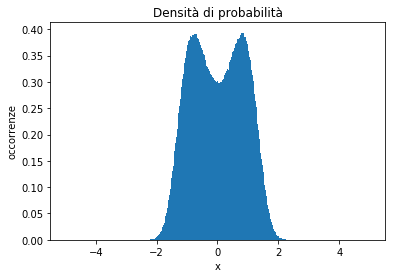

In [32]:
bins,occorrenze = np.loadtxt("QMC_1D/Risultati_T0/probabilitytrial.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.bar(bins,occorrenze,align='edge', width=4.7125-4.6875)
plt.title('Densità di probabilità')
plt.xlabel('x')
plt.ylabel('occorrenze')
plt.show()

Ho eseguito il codice anche scegliendo come funzione d'onda la somma di gaussiane scelta all'inizio dell'esercitazione come funzione di prova, con i parametri ottimizzati che ho trovato in precedenza.  

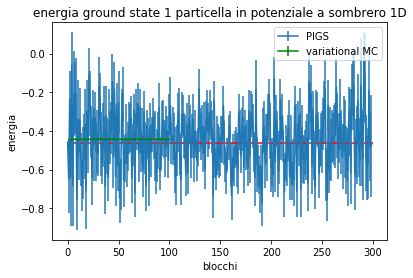

In [33]:
blkkin,kin, errkin=np.loadtxt("QMC_1D/Risultati_T0/kineticprova.dat",usecols=(0,1,2), delimiter=' ', unpack=True)
blkpot, pot, errpot=np.loadtxt("QMC_1D/Risultati_T0/potentialprova.dat",usecols=(0,1,2), delimiter=' ', unpack=True)
plt.errorbar(blkkin,kin+pot,yerr=(errkin*errkin+errpot*errpot)**0.5, label="PIGS")
g=np.full(blkkin.size, -0.46046587969271535)
plt.plot(blkkin,g,c="red")
plt.errorbar(e,r,yerr=error, color="green", label="variational MC")
plt.xlabel('blocchi')
plt.ylabel('energia')
plt.legend()
plt.title('energia ground state 1 particella in potenziale a sombrero 1D')
plt.show()

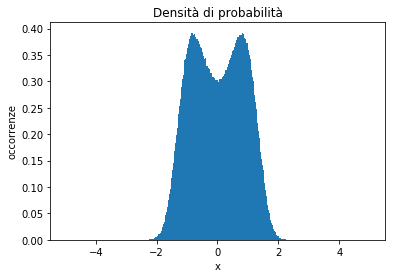

In [34]:
bins,occorrenze = np.loadtxt("QMC_1D/Risultati_T0/probabilityprova.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.bar(bins,occorrenze,align='edge', width=4.7125-4.6875, label="sampled")
plt.title('Densità di probabilità')
plt.xlabel('x')
plt.ylabel('occorrenze')
plt.show()

Ho infine usato l'algoritmo PIMC per osservare la funzione d'onda campionata a temperature diverse da zero: 

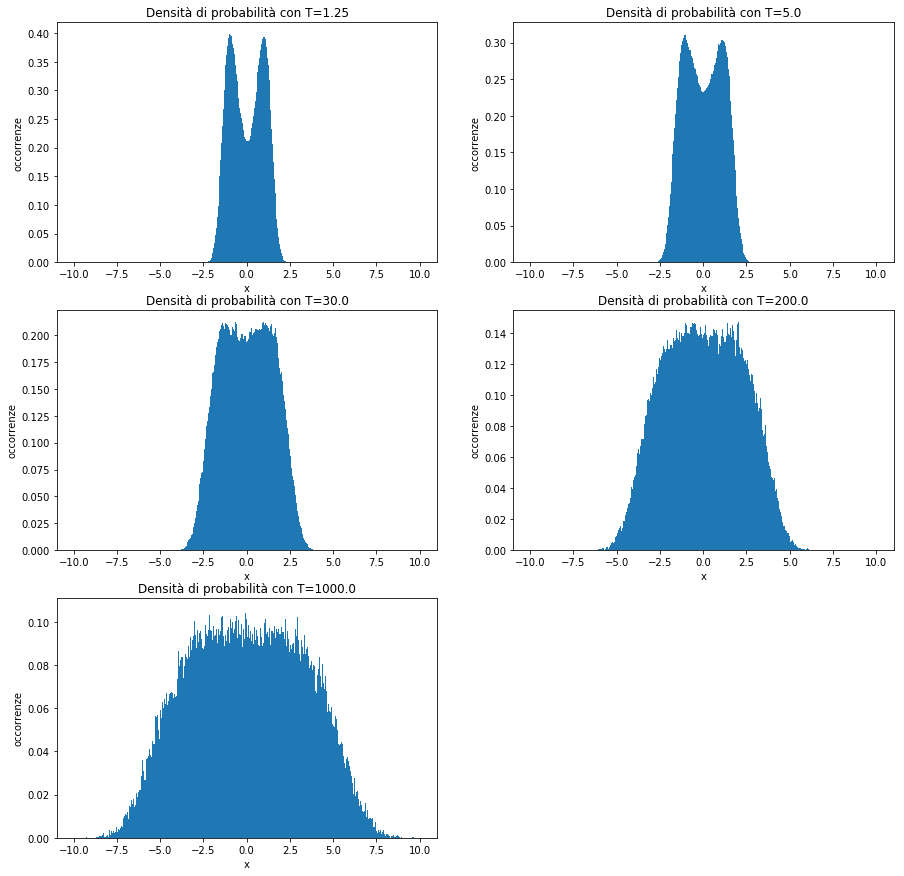

In [44]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
bins,occorrenze = np.loadtxt("QMC_1D/Risultati_Tnn/probability1_25.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.bar(bins,occorrenze,align='edge', width=2.475-2.425, label="sampled")
plt.title('Densità di probabilità con T=1.25')
plt.xlabel('x')
plt.ylabel('occorrenze')

plt.subplot(3,2,2)
bins,occorrenze = np.loadtxt("QMC_1D/Risultati_Tnn/probability5_0.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.bar(bins,occorrenze,align='edge', width=2.475-2.425, label="sampled")
plt.title('Densità di probabilità con T=5.0')
plt.xlabel('x')
plt.ylabel('occorrenze')


plt.subplot(3,2,3)
bins,occorrenze = np.loadtxt("QMC_1D/Risultati_Tnn/probability30_0.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.bar(bins,occorrenze,align='edge', width=2.475-2.425, label="sampled")
plt.title('Densità di probabilità con T=30.0')
plt.xlabel('x')
plt.ylabel('occorrenze')


plt.subplot(3,2,4)
bins,occorrenze = np.loadtxt("QMC_1D/Risultati_Tnn/probability200_0.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.bar(bins,occorrenze,align='edge', width=2.475-2.425, label="sampled")
plt.title('Densità di probabilità con T=200.0')
plt.xlabel('x')
plt.ylabel('occorrenze')


plt.subplot(3,2,5)
bins,occorrenze = np.loadtxt("QMC_1D/Risultati_Tnn/probability1000_0.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.bar(bins,occorrenze,align='edge', width=2.475-2.425, label="sampled")
plt.title('Densità di probabilità con T=1000.0')
plt.xlabel('x')
plt.ylabel('occorrenze')
plt.show()